In [15]:
# for breast cancer
# import package
from SBS import *
# -----------manipulate data package-----------
import pandas as pd
import numpy as np
# -----------machine learning package-----------
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

from xgboost import XGBClassifier
# -----------ploting package-----------
import matplotlib
import matplotlib.pyplot as plt
# for plot showing log in xscale
matplotlib.rc('font', family='Arial')
%matplotlib inline 
# plot in jupyter

In [6]:
# load data csv or db
# load breast cancer dataset
cancer = load_breast_cancer()
data_ay = np.c_[cancer.data, cancer.target]

columns = np.append(cancer.feature_names, ["target"])
data = pd.DataFrame(data_ay, columns=columns)

cancered = data[data['target']==1].copy().reset_index(drop=True)
no_cancer = data[data['target']==0].copy().reset_index(drop=True)

print(len(no_cancer),len(cancered))

212 357


In [7]:
# X = dia_df.iloc[:,:-1].values
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [8]:
# 正規化
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

In [27]:

rf = RandomForestClassifier(random_state=1)
rf.fit(X_train_std,y_train)

print('train_score',round(rf.score(X_train_std,y_train),4))
print('test_score',round(rf.score(X_test_std,y_test),4))

train_score 0.9978
test_score 0.9474


In [16]:
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(rf,k_features=1)
sbs.fit(X_train_std,y_train)

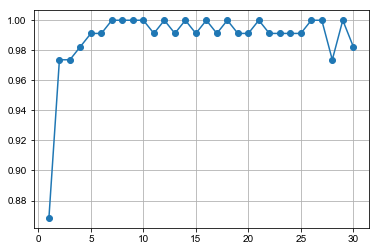

In [17]:
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')

plt.grid(b=True)

In [22]:
# 還沒想到怎麼直接寫出最佳特徵，所以還是用圖找，看起來只要七個欄位就行。

feature_numer = list(sbs.subsets_[23])
print(len(feature_numer))

7


In [25]:
SBS_best_feature = data.iloc[:,:-1].columns[feature_numer].values.tolist()
print(SBS_best_feature)

['mean concave points', 'mean fractal dimension', 'texture error', 'area error', 'compactness error', 'worst texture', 'worst symmetry']


In [32]:
# 比較

# X = dia_df.iloc[:,:-1].values
X_SBS = data[SBS_best_feature].values
y = data.iloc[:,-1].values
X_train_SBS,X_test_SBS,y_train_SBS,y_test_SBS = train_test_split(X_SBS,y,test_size=0.2,random_state=1)

# 正規化
stdsc = StandardScaler()
X_train_std_SBS = stdsc.fit_transform(X_train_SBS)
X_test_std_SBS = stdsc.transform(X_test_SBS)

rf.fit(X_train_std,y_train)
print('train_score',round(rf.score(X_train_std,y_train),4))
print('test_score',round(rf.score(X_test_std,y_test),4))
print(20*'-','SBS篩選特徵過後',20*'-')
rf.fit(X_train_std_SBS,y_train)
print('train_score',round(rf.score(X_train_std_SBS,y_train),4))
print('test_score',round(rf.score(X_test_std_SBS,y_test),4))

train_score 0.9978
test_score 0.9474
-------------------- SBS篩選特徵過後 --------------------
train_score 1.0
test_score 0.9561
